In [1]:
%matplotlib inline

Crop images with ImageContainer
===============================

This example shows how crop images from `squidpy.im.ImageContainer`.

Specifically, it shows how to use:

> -   {func}`squidpy.im.ImageContainer.crop_corner()`
> -   {func}`squidpy.im.ImageContainer.crop_center()`


In [3]:
import matplotlib.pyplot as plt

import squidpy as sq

Let\'s load the fluorescence Visium image.


In [4]:
img = sq.datasets.visium_fluo_image_crop()

Extracting single crops: Crops need to be sized and located. We
distinguish crops located based on a corner coordinate of the crop and
crops located based on the center coordinate of the crop. You can
specify the crop coordinates in pixels (as `int`) or in percentage of
total image size (as `float`). In addition, you can specify a scaling
factor for the crop.


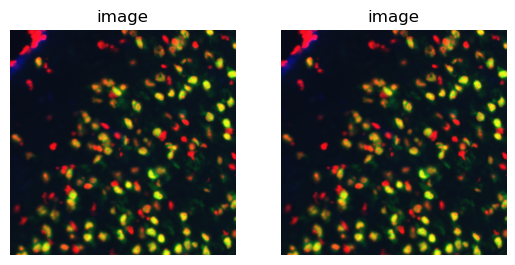

In [5]:
crop_corner = img.crop_corner(1000, 1000, size=800)

crop_center = img.crop_center(1400, 1400, radius=400)

fig, axes = plt.subplots(1, 2)
crop_corner.show(ax=axes[0])
crop_center.show(ax=axes[1])

The result of the cropping functions is another ImageContainer.


In [6]:
crop_corner

ImageContainer[shape=(800, 800), layers=['image']]

You can subset the associated `adata` to the cropped image using
{func}`squidpy.im.ImageContainer.subset`:


In [7]:
adata = sq.datasets.visium_fluo_adata_crop()
adata

AnnData object with n_obs × n_vars = 704 × 16562
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_counts', 'leiden', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

Note the number of observations in `adata` before and after subsetting.


In [8]:
adata_crop = crop_corner.subset(adata)
adata_crop

View of AnnData object with n_obs × n_vars = 7 × 16562
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_counts', 'leiden', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

Visualize the result in Napari:


In [ ]:
crop_corner.interactive(adata_crop)